## Chinese prompts

In [1]:
import pandas as pd

df_dataset = pd.read_csv('math500_qwq32b_preview_code_switching.csv')
print(df_dataset.head())

   problem_id  switch_count  token_length               subject  level  \
0           0             5           730           Precalculus      2   
1           1            25          1337  Intermediate Algebra      5   
2           2             1           545               Algebra      3   
3           3             3          1392         Number Theory      3   
4           4            12          1434               Algebra      2   

                                     switch_snippets  
0  1. 下需要特别处理，比如当 \( x = 0 \) 时，因为除法会 undefined。\...  
1  1. 于每个m，j可以取从1到m-1的值，因为j和k都是正整数。\n\n wait，如果m ...  
2  1. 的。\n\n所以，最终答案是 $\frac{14}{3}$。\n\n**Final A...  
3  1. 2是49，49是7的平方，所以只有2和7两个质因数。\n\n或者， maybe我应该考...  
4  1. 时间，然后计算出他们的平均速度，就能比较出来谁的最大。\n\n看这个Asymptote...  


In [2]:
import numpy as np

# Assuming you already have a DataFrame named df_dataset
# and columns "switch_count" and "token_length" exist

# Extract numpy arrays
switch_count = df_dataset["switch_count"].values
token_length = df_dataset["token_length"].values

# 1. Percentage of problems with code switching
num_problems = len(switch_count)
num_with_switch = np.sum(switch_count > 0)
percent_with_switch = (num_with_switch / num_problems) * 100

# 2. Code-switching count per problem (average)
avg_switch_per_problem = np.mean(switch_count)

# 3. Code-switching count per token (average)
# To avoid division by zero
valid_tokens = token_length > 0
avg_switch_per_token = np.mean(switch_count[valid_tokens] / token_length[valid_tokens])

# Print results
print(f"🔢 Total problems: {num_problems}")
print(f"💬 Problems with code switching: {num_with_switch} ({percent_with_switch:.2f}%)")
print(f"📊 Average code-switches per problem: {avg_switch_per_problem:.2f}")
print(f"🧮 Average code-switches per token: {avg_switch_per_token:.4f}")


🔢 Total problems: 500
💬 Problems with code switching: 411 (82.20%)
📊 Average code-switches per problem: 6.30
🧮 Average code-switches per token: 0.0053


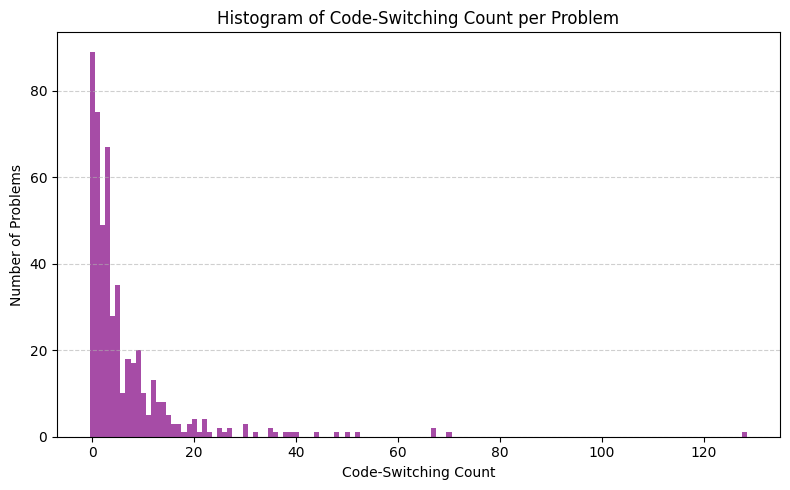

In [3]:
import matplotlib.pyplot as plt

# Assuming switch_count is already loaded (e.g., from df_dataset["switch_count"])
plt.figure(figsize=(8, 5))
plt.hist(switch_count, bins=range(0, max(switch_count)+2), edgecolor='none', align='left', color='purple', alpha=0.7)

plt.title("Histogram of Code-Switching Count per Problem")
plt.xlabel("Code-Switching Count")
plt.ylabel("Number of Problems")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [4]:
# Find the row with the maximum number of code switches
max_row = df_dataset.loc[df_dataset["switch_count"].idxmax()]

# Print basic info
print(f"🔥 Problem with most code switches:")
print(f"- Problem ID: {max_row['problem_id']}")
print(f"- Switch Count: {max_row['switch_count']}")

# Print each snippet
print("\n📌 Code-Switching Snippets:")
snippets = str(max_row["switch_snippets"]).split("|")
for i, snip in enumerate(snippets, 1):
    print(f"{snip}")


🔥 Problem with most code switches:
- Problem ID: 193
- Switch Count: 128

📌 Code-Switching Snippets:
1. 是用来找整系数多项式的有理根的。具体来说，对于一个整系数多项式 equation{a_n x^n + a_{n-1}x^{n-1

2. x^{n-1} + ... + a_1 x + a_0 = 0}，如果它有一个有理根 equation{p/q}，其中 equa

3. .. + a_1 x + a_0 = 0}，如果它有一个有理根 equation{p/q}，其中 equation{p} 和 e

4. a_0 = 0}，如果它有一个有理根 equation{p/q}，其中 equation{p} 和 equation{q} 是互

5. = 0}，如果它有一个有理根 equation{p/q}，其中 equation{p} 和 equation{q} 是互质的整数

6. 理根 equation{p/q}，其中 equation{p} 和 equation{q} 是互质的整数，那么 equation

7.  equation{p/q}，其中 equation{p} 和 equation{q} 是互质的整数，那么 equation{p

8. q}，其中 equation{p} 和 equation{q} 是互质的整数，那么 equation{p} 必须是常数项 equ

9. tion{p} 和 equation{q} 是互质的整数，那么 equation{p} 必须是常数项 equation{a_0}

10. uation{q} 是互质的整数，那么 equation{p} 必须是常数项 equation{a_0} 的因数，而 equat

11. q} 是互质的整数，那么 equation{p} 必须是常数项 equation{a_0} 的因数，而 equation{q} 

12. quation{p} 必须是常数项 equation{a_0} 的因数，而 equation{q} 必须是最高次项系数 equa

13. n{p} 必须是常数项 equation{a_0} 的因数，而 equation{q} 必须是最高次项系数 equation{a

/tmp/ipykernel_3709100/100563892.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Pastel2", len(subject_avg))  # You can also try "Set3", "Accent", "Pastel1", etc.


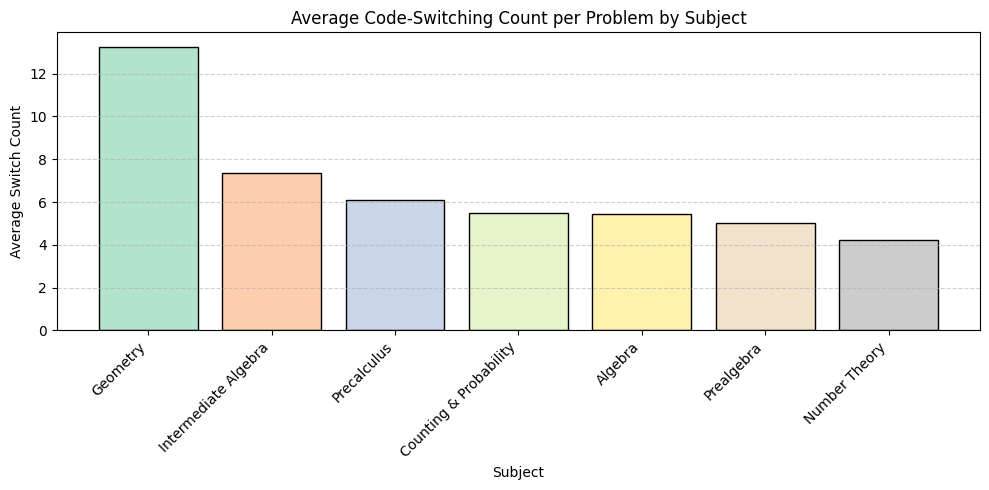

In [5]:
# Group by 'subject' and calculate average switch count
subject_avg = df_dataset.groupby("subject")["switch_count"].mean().sort_values(ascending=False)

# Plot
cmap = plt.cm.get_cmap("Pastel2", len(subject_avg))  # You can also try "Set3", "Accent", "Pastel1", etc.
colors = [cmap(i) for i in range(len(subject_avg))]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(subject_avg.index, subject_avg.values, color=colors, edgecolor="black", alpha=1.0)


plt.title("Average Code-Switching Count per Problem by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Switch Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3709100/3563556327.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Pastel1", len(level_avg))


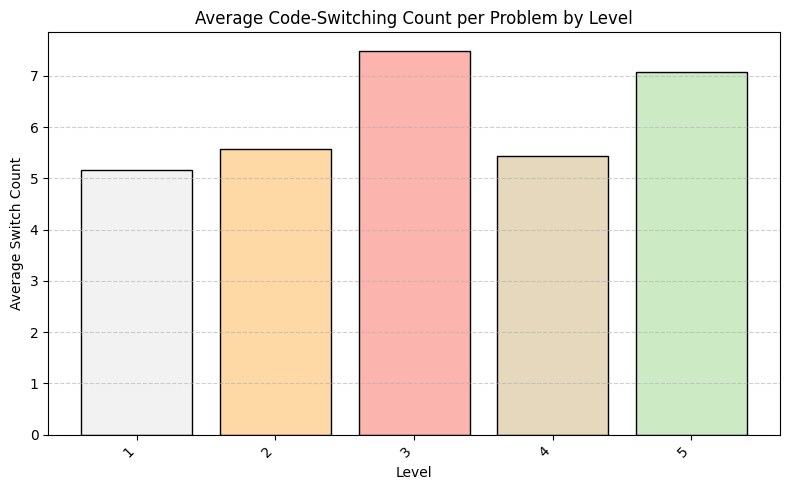

In [6]:
# Group by 'level' and calculate average switch count
level_avg = df_dataset.groupby("level")["switch_count"].mean().sort_values(ascending=False)

# Generate distinct colors for each level
cmap = plt.cm.get_cmap("Pastel1", len(level_avg))
colors = [cmap(i) for i in range(len(level_avg))]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(level_avg.index, level_avg.values, color=colors, edgecolor="black")

plt.title("Average Code-Switching Count per Problem by Level")
plt.xlabel("Level")
plt.ylabel("Average Switch Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## English prompts

In [7]:


df_dataset = pd.read_csv('math500_qwq32b_preview_code_switching_en.csv')
print(df_dataset.head())

   problem_id  switch_count  token_length               subject  level  \
0           0             0           906           Precalculus      2   
1           1             0          2048  Intermediate Algebra      5   
2           2             0           713               Algebra      3   
3           3             0           698         Number Theory      3   
4           4             0          1063               Algebra      2   

  switch_snippets  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


In [8]:
import numpy as np

# Assuming you already have a DataFrame named df_dataset
# and columns "switch_count" and "token_length" exist

# Extract numpy arrays
switch_count = df_dataset["switch_count"].values
token_length = df_dataset["token_length"].values

# 1. Percentage of problems with code switching
num_problems = len(switch_count)
num_with_switch = np.sum(switch_count > 0)
percent_with_switch = (num_with_switch / num_problems) * 100

# 2. Code-switching count per problem (average)
avg_switch_per_problem = np.mean(switch_count)

# 3. Code-switching count per token (average)
# To avoid division by zero
valid_tokens = token_length > 0
avg_switch_per_token = np.mean(switch_count[valid_tokens] / token_length[valid_tokens])

# Print results
print(f"🔢 Total problems: {num_problems}")
print(f"💬 Problems with code switching: {num_with_switch} ({percent_with_switch:.2f}%)")
print(f"📊 Average code-switches per problem: {avg_switch_per_problem:.2f}")
print(f"🧮 Average code-switches per token: {avg_switch_per_token:.4f}")

🔢 Total problems: 500
💬 Problems with code switching: 6 (1.20%)
📊 Average code-switches per problem: 0.08
🧮 Average code-switches per token: 0.0001


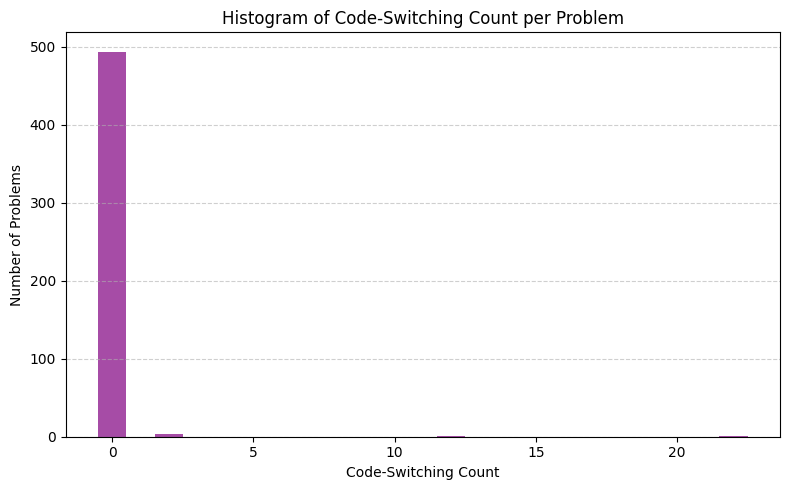

In [9]:
import matplotlib.pyplot as plt

# Assuming switch_count is already loaded (e.g., from df_dataset["switch_count"])
plt.figure(figsize=(8, 5))
plt.hist(switch_count, bins=range(0, max(switch_count)+2), edgecolor='none', align='left', color='purple', alpha=0.7)

plt.title("Histogram of Code-Switching Count per Problem")
plt.xlabel("Code-Switching Count")
plt.ylabel("Number of Problems")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [10]:
# Find the row with the maximum number of code switches
max_row = df_dataset.loc[df_dataset["switch_count"].idxmax()]

# Print basic info
print(f"🔥 Problem with most code switches:")
print(f"- Problem ID: {max_row['problem_id']}")
print(f"- Switch Count: {max_row['switch_count']}")

# Print each snippet
print("\n📌 Code-Switching Snippets:")
snippets = str(max_row["switch_snippets"]).split("|")
for i, snip in enumerate(snippets, 1):
    print(f"{snip}")

🔥 Problem with most code switches:
- Problem ID: 491
- Switch Count: 22

📌 Code-Switching Snippets:
1. ndependent of each other.

Also,确认一下眼睛只有 googly eyes 一种选项，没有其他类型

2. t of each other.

Also,确认一下眼睛只有 googly eyes 一种选项，没有其他类型的眼睛，所以眼睛的

3. her.

Also,确认一下眼睛只有 googly eyes 一种选项，没有其他类型的眼睛，所以眼睛的选项是固定的。

另外，

4. 有其他类型的眼睛，所以眼睛的选项是固定的。

另外，鞋子有两套：regular 和 clown shoes。

所以，再次确认，

5. ，所以眼睛的选项是固定的。

另外，鞋子有两套：regular 和 clown shoes。

所以，再次确认，总的人格数量是 

6. 以眼睛的选项是固定的。

另外，鞋子有两套：regular 和 clown shoes。

所以，再次确认，总的人格数量是 4 

7. 

另外，鞋子有两套：regular 和 clown shoes。

所以，再次确认，总的人格数量是 4 (hair) × 2 

8. lown shoes。

所以，再次确认，总的人格数量是 4 (hair) × 2 (eyebrows) × 1 (eyes) 

9. ars) × 2 (lips) × 2 (shoes) = 64。

看起来答案就是 64。

不过，再想想，也许问题在于“op

10. 64。

看起来答案就是 64。

不过，再想想，也许问题在于“optionally hair”，也就是可以没有头发，即 bal

11. 

不过，再想想，也许问题在于“optionally hair”，也就是可以没有头发，即 bald 也是一个选项。但这个已经在 

12. 在于“optionally hair”，也就是可以没有头发，即 bald 也是一个选项。但这个已经在 hair options 

13. tionally hair”，也就是可以没有头发，即 bald 也是一个选项。但这个已经在 hair options 里包含了，


/tmp/ipykernel_3709100/100563892.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Pastel2", len(subject_avg))  # You can also try "Set3", "Accent", "Pastel1", etc.


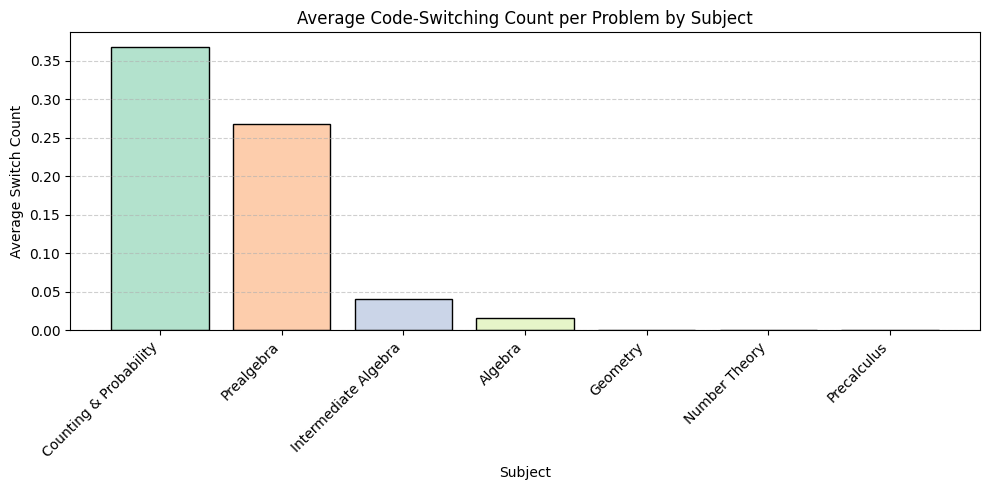

In [11]:
# Group by 'subject' and calculate average switch count
subject_avg = df_dataset.groupby("subject")["switch_count"].mean().sort_values(ascending=False)

# Plot
cmap = plt.cm.get_cmap("Pastel2", len(subject_avg))  # You can also try "Set3", "Accent", "Pastel1", etc.
colors = [cmap(i) for i in range(len(subject_avg))]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(subject_avg.index, subject_avg.values, color=colors, edgecolor="black", alpha=1.0)


plt.title("Average Code-Switching Count per Problem by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Switch Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3709100/3156123244.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Pastel1", len(level_avg))


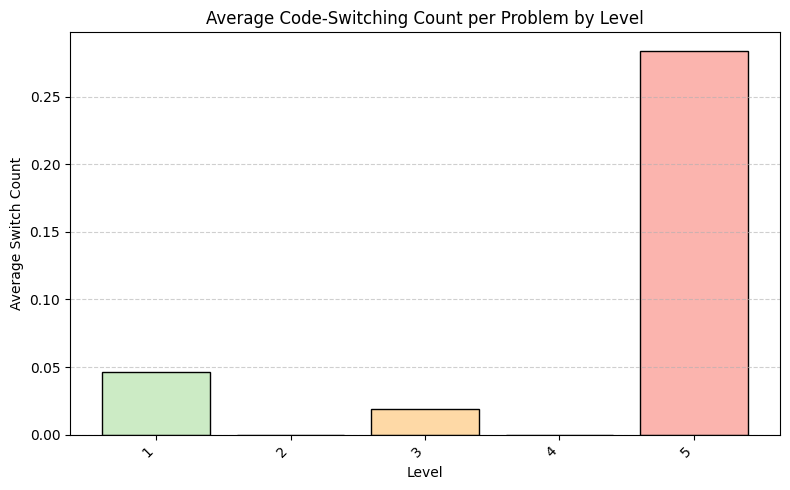

In [12]:
# Group by 'level' and calculate average switch count
level_avg = df_dataset.groupby("level")["switch_count"].mean().sort_values(ascending=False)

# Generate distinct colors for each level
cmap = plt.cm.get_cmap("Pastel1", len(level_avg))
colors = [cmap(i) for i in range(len(level_avg))]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(level_avg.index, level_avg.values, color=colors, edgecolor="black")

plt.title("Average Code-Switching Count per Problem by Level")
plt.xlabel("Level")
plt.ylabel("Average Switch Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()